<a href="https://colab.research.google.com/github/MarioCass10/Copa-del-Mundo-Data-Science/blob/main/Copa_del_Mundo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.8/dist-packages/plotnine/guides/guides.py:197: PlotnineWarning:

Cannot generate legend for the 'fill' aesthetic. Make sure you have mapped a variable to it



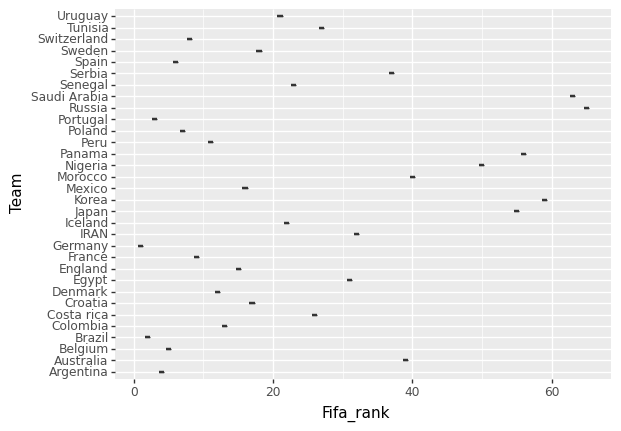

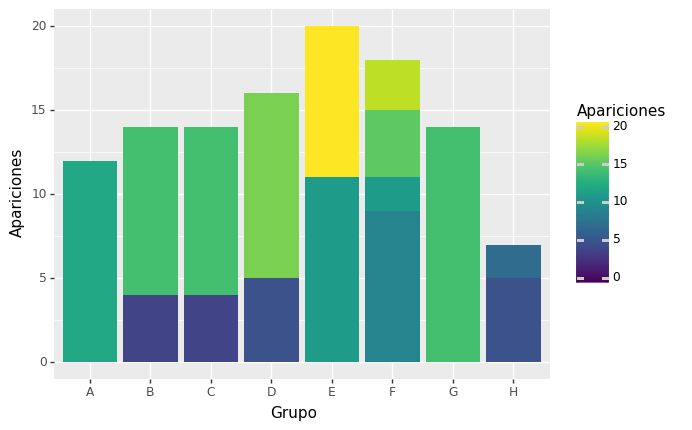

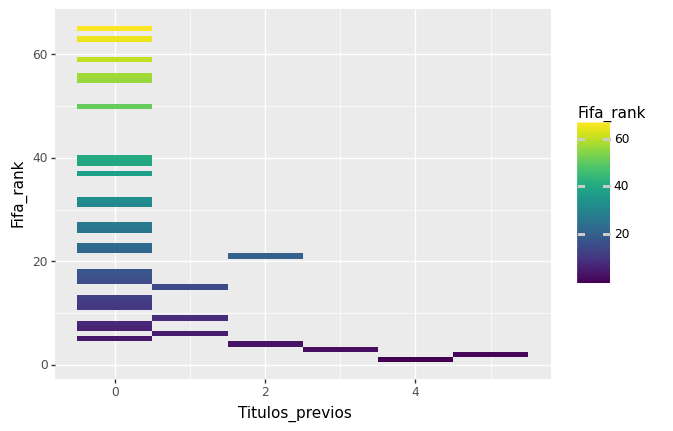

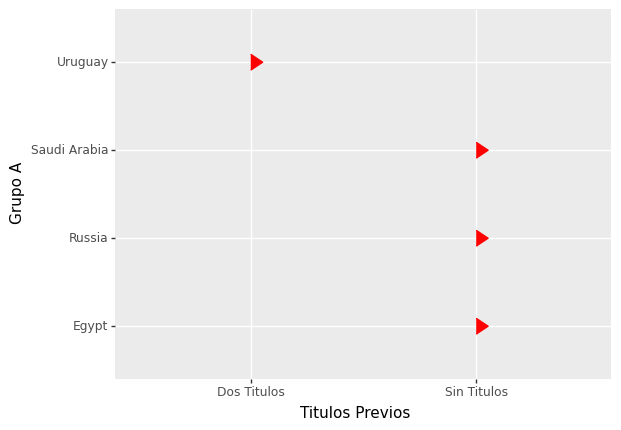

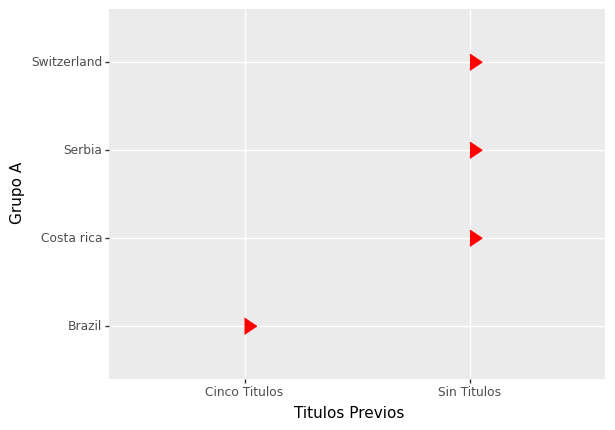

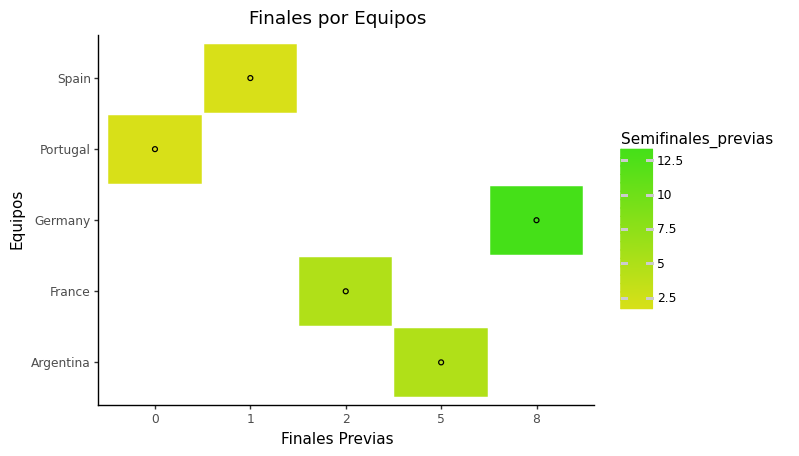

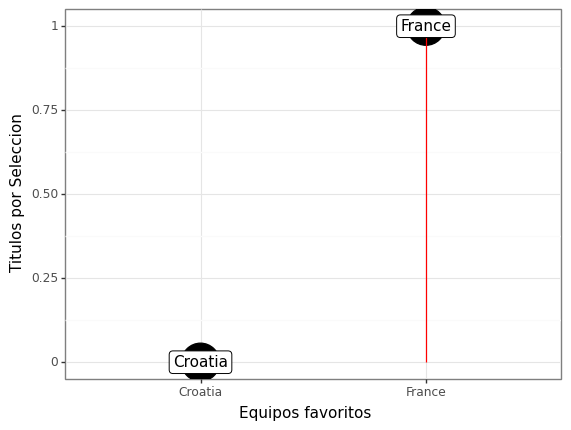

In [5]:
import pandas as pd
from plotnine import*
from plotnine.data import* 
from matplotlib.backends.backend_pdf import fill
from plotnine.themes.themeable import panel_background
import matplotlib.pyplot as plt
import cufflinks as cufflinks
import plotly as py

data = pd.read_excel("/content/World-Cup-2018-Dataset.xlsx")

#El proyecto es realizado en el lenguaje python y con los graficos proporcionados con el profesor en clase
#El Dataset Soccer World Cup 2018 Winner extraido de internet, el cual fue editado para su uso en este proyecto

#La iniciativa anterior era realizar este proyecto con el Databaset de la Copa del Mundo Qatar 2022, pero por falta de tiempo y de datos de la misma, ya que es una copa
#que aun no ha culminado no se podian obtener todos los datos, por lo que con la yuda del profesor se llego a la conclusion de escoger la la edicion anterior que es
#Copa del MUndo Rusia 2022

#Ahora con esto dicho, echaremos un vistazo a lo que son las estadisticas mas importantes a considerar para este Mundial
#Con el incio del Mundial comienza la fase de grupos, echemos un vistazo a los partidos mas interesantes, con proyeccion a llevarse la gran copa
#¿Cual sera tu prediccion? Ya tenemos la nuestra y te la mostramos:

#En este primer grafico podemos observar en el orden alfabetico de la Z-A los equipos que participaran en este Mundial y su Rank a nivel FIFA
#Utilizando el grafico geom_boxplot
grafico1 = ggplot(aes(x="Fifa_rank",y="Team"),data)+geom_boxplot()+scale_fill_brewer(type="seq",palette="BuGn")
print(grafico1)

#En este segundo grafico podemos observar que grupo tuvo mas apariciones 
#Utilizando el grafico geom_bar
matches = data.loc[:,["Team","partido1"]]
partido=data.melt(id_vars=["Grupo","Apariciones"], var_name="partido1", value_name="puntuacion")
grafico2 = ggplot(aes(x="Grupo",y="Apariciones", fill="Apariciones"),partido)+geom_bar(stat="identity",position="dodge")
print(grafico2)

#En este tercer grafico se puede apreciar depediendo del rank del equipo, los titulos previos 
#Utilizando el grafico geom_tile
macth2=data.melt(id_vars=["Titulos_previos","Fifa_rank"], var_name="partido1", value_name="puntuacion")
grafico3 = ggplot(aes(x ="Titulos_previos", y ="Fifa_rank", fill ="Fifa_rank"),macth2)+geom_tile()
print(grafico3)

#Aqui podemos observar segun por estadistica el equipo con mas titulos de este grupo A, por lo que se puede notar es Uruguay: 2 Titulos
#Eso nos da entender que el candidato favorito seria Uruguay
#Aunque no sabemos nunca que sorpresas nos podemos llevar, ya que es un Mundial y no sabes que pasara
#Utilizando el grafico geom_point
grupoA = data.loc[data.Team.isin(["Russia","Saudi Arabia","Uruguay","Egypt"])].loc[:,["Team","Fifa_rank","Titulos_previos","Apariciones"]]
x  = grupoA.groupby(by=["Fifa_rank","Titulos_previos","Apariciones"],as_index=False).sum()
h = x.Titulos_previos.replace(to_replace=(0,1,2,3,4,5),value=("Sin Titulos","Un Titulo","Dos Titulos","Tres Titulos","Cuatro Titulos","Cinco Titulos"),inplace=True)
grafico4 = ggplot(aes(group = "Apariciones", x="factor(Titulos_previos)",y="Team", color="Apariciones"),x)+geom_point(color="Red",size=6,shape=9)+labs(x="Titulos Previos", y="Grupo A")
print(grafico4)

#Como se puede apreciar en este Grupo, como favorito para ganar la Copa del Mundo, quien mas que Brazil no?
#Una diferencia muy notoria a comparacion que el GrupoA
#Utilizando el grafico geom_point
grupoE = data.loc[data.Team.isin(["Brazil","Switzerland","Costa rica","Serbia"])].loc[:,["Team","Fifa_rank","Titulos_previos","Apariciones"]]
x  = grupoE.groupby(by=["Fifa_rank","Titulos_previos","Apariciones"],as_index=False).sum()
h = x.Titulos_previos.replace(to_replace=(0,1,2,3,4,5),value=("Sin Titulos","Un Titulo","Dos Titulos","Tres Titulos","Cuatro Titulos","Cinco Titulos"),inplace=True)
grafico5 = ggplot(aes(group = "Apariciones", x="factor(Titulos_previos)",y="Team", color="Apariciones"),x)+geom_point(color="Red",size=6,shape=9)+labs(x="Titulos Previos", y="Grupo A")
print(grafico5)

#En este grafico se puede pbservar lo que son para mi las selecciones favoritas a llevarse este Mundial
#Pero quien sabe y alguna otra que no esta entre estas nos da una sorpresa
#¿Tu que crees?
#Utilizando el grafico geom_tile y geom_point
grupoD = data.loc[data.Team.isin(["Argentina","Germany","Spain","France","Portugal"])].loc[:,["Team","Semifinales_previas","Finales_previas","Apariciones"]]
x  = grupoD.groupby(by=["Semifinales_previas","Finales_previas","Apariciones"],as_index=False).sum()
grafico6 = ggplot(aes(x="factor(Finales_previas)",y="factor(Team)",fill="Semifinales_previas"),x)+geom_tile(color="white",size=1)+geom_point()\
    +scale_fill_gradient(low="#D8E018",high="#45E018")\
    +labs(x="Finales Previas",y="Equipos")+ggtitle("Finales por Equipos")\
    +theme_classic()
print(grafico6)

#Y con este grafico se puede apreciar lo que fue la gran final del Mundial Rusia 2018, en donde uno de los dos equipos sorpresivamente (sabemos todos cual es)
#llego a la final y con meritos, papeles y desempeños muy increibles e importantes.
#Importante resaltar que la seleccion favorita fue Francia en todos los aspectos, la cual fue la seleccion ganadora en este Mundial
#Francia campeona del Mundo Rusia 2018.-
##Utilizando el grafico Lollipops
final = data.loc[data.Team.isin(["Croatia","France"])].loc[:,["Team","Semifinales_previas","Titulos_previos","Fifa_rank"]]
grafico7 = ggplot(aes("Team","Titulos_previos"),final)+geom_point(size = 15, colour = "black")\
+geom_segment(aes(x="Team",xend="Team", y=0, yend="Titulos_previos"),color="red")\
+geom_label(aes("Team", "Titulos_previos",label=("Team")))\
+labs(y= "Titulos por Seleccion", x="Equipos favoritos")+theme_bw()
print(grafico7)

